In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)


In [2]:
n_points = 100
x_max = 15

# assume 'X' is your independent variable and 'y' is your dependent variable
X = np.linspace(1, 3, n_points)  # your data here
Z = np.log(np.linspace(1, 3, n_points))
mu = np.average(np.linspace(1, 3, n_points))
y = 5* X  - 0.2*X **2 + 3*np.random.normal(0, 1, n_points) + 20 # your data here

# add a constant to the independent value to get an intercept term
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()



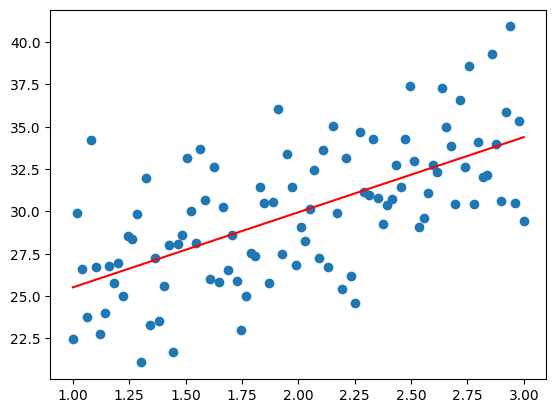

In [3]:
# get the predicted values
y_pred = model.predict(X)

# plot the data points
plt.scatter(X[:, 1], y)

# plot the regression line
plt.plot(X[:, 1], y_pred, color='red')

# show the plot
plt.show()

In [4]:

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     66.02
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.37e-12
Time:                        23:16:49   Log-Likelihood:                -256.65
No. Observations:                 100   AIC:                             517.3
Df Residuals:                      98   BIC:                             522.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0852      1.137     18.546      0.0

In [5]:

Z = sm.add_constant(Z)

# fit the model
model_z = sm.OLS(y, Z).fit(cov_type="HC1")


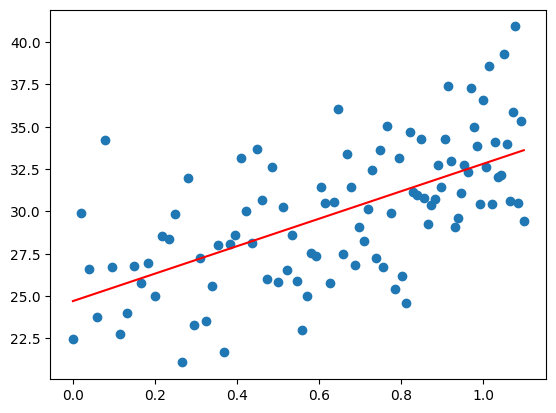

In [6]:
# get the predicted values
y_pred_z = model_z.predict(Z)

# plot the data points
plt.scatter(Z[:, 1], y)

# plot the regression line
plt.plot(Z[:, 1], y_pred_z, color='red')

# show the plot
plt.show()

In [7]:
print(model_z.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     55.11
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           4.22e-11
Time:                        23:16:50   Log-Likelihood:                -258.17
No. Observations:                 100   AIC:                             520.3
Df Residuals:                      98   BIC:                             525.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7064      0.792     31.201      0.0

In [8]:
print(model_z.params[1], mu * model.params[1])

8.111345628372689 8.868587526204294
